# Tên bài: Thực hiện thống kê mô tả trên tập dữ liệu về bệnh tiểu đường.

## Bài làm


### import thư viện cần thiết và đọc file

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns

du_lieu_tieu_duong = pd.read_csv("data/diabetes.csv")   
du_lieu_tieu_duong.head()
du_lieu_tieu_duong.info()
du_lieu_tieu_duong.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Nhận thấy:
+ Có 786 mẫu
+ Không thấy giá trị nào null nhưng mà có những giá trị bằng 0 không được nên cần kiểm tra lại

### Vấn đề đặc biệt: giá trị 0

In [ ]:
cols_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for c in cols_zero:
    print(c, "zeros:", (du_lieu_tieu_duong[c]==0).sum())
du_lieu_tieu_duong[cols_zero] = du_lieu_tieu_duong[cols_zero].replace(0, np.nan)
print(du_lieu_tieu_duong.isnull().sum())


Glucose zeros: 5
BloodPressure zeros: 35
SkinThickness zeros: 227
Insulin zeros: 374
BMI zeros: 11
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


=> Cột 'Insulin' và cột 'SkinThickness' có dữ liệu bằng 0 rất lớn, cột 'Glucose' và cột 'BloodPressure' cũng có giá trị bằng 0 nhưng ít hơn nhiều so với 2 cột trên

### Kiểm tra cân bằng lớp

In [3]:
print(du_lieu_tieu_duong['Outcome'].value_counts())
print(du_lieu_tieu_duong['Outcome'].value_counts(normalize=True))


Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


Đánh giá:
+ Tỷ lệ phân bố là khoảng 65:35 (hoặc xấp xỉ 2:1).

+ Sự khác biệt 65.10% vs 34.90% được coi là mất cân bằng lớp vừa phải đến đáng kể

### Phân bố và outliers

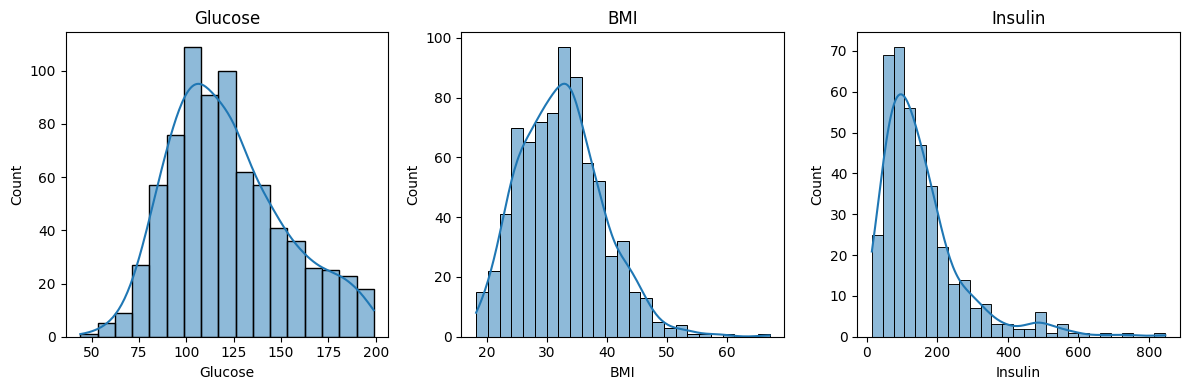

In [4]:
# Histogram cho Glucose, BMI, Insulin
plt.figure(figsize=(12,4))
for i,c in enumerate(['Glucose','BMI','Insulin']):
    plt.subplot(1,3,i+1)
    sns.histplot(du_lieu_tieu_duong[c].dropna(), kde=True)
    plt.title(c)
plt.tight_layout()
